In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the encoding when reading the CSV file
car_data = pd.read_csv('car_purchasing.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
car_data.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [36]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [37]:
car_data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [38]:
car_data.drop(columns=[ 'customer name','customer e-mail','country'], inplace=True)


In [39]:
car_data.duplicated().sum()

0

In [40]:
car_data['car purchase amount'].value_counts()

,count
car purchase amount,
35321.45877,1
31526.04931,1
59096.26978,1
28733.68779,1
23517.91983,1
...,...
46453.34819,1
57125.41541,1
37714.31659,1


In [41]:
car_data.sample()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
359,1,36.718155,70621.52393,9384.067625,366327.7432,39083.94268


In [42]:
x = car_data.drop(['car purchase amount'],axis=1)
y = car_data['car purchase amount']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [44]:
x_train_scaled

array([[-1.01511421, -0.45859588, -0.4950373 ,  0.37167169,  2.05983279],
       [ 0.98511083, -0.0625841 ,  0.11866495,  0.33830402, -0.68113743],
       [ 0.98511083, -1.21796905,  0.88206171,  0.48405159,  0.86514814],
       ...,
       [-1.01511421, -0.42557135,  1.33516755,  1.08729153, -0.48764456],
       [ 0.98511083,  0.89652195,  0.2007034 ,  0.51552502,  0.27478581],
       [-1.01511421,  0.07930926, -1.24227204, -2.48468173, -0.16403068]])

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dense(10, activation='relu'),

    layers.Dense(1, activation='linear')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
x_train_scaled.shape[1]

5

In [47]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history =model.fit(x_train_scaled, y_train, epochs=60, batch_size=32, validation_split=0.1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 50)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821 (3.21 KB)

 Trainable params: 821 (3.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 313708.7500 - val_accuracy: 0.0000e+00 - val_loss: 137796.5781
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 108130.3594 - val_accuracy: 0.0000e+00 - val_loss: -19609.6289
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -43013.2031 - val_accuracy: 0.0000e+00 - val_loss: -113273.3984
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -189502.3594 - val_accuracy: 0.0000e+00 - val_loss: -215219.0000
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -310972.1250 - val_accuracy: 0.0000e+00 - val_loss: -380614.6875
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -452343.8125 - val_accuracy: 0.0000e+00 - val_loss: -625269.7500
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -607451.8750 - val_accuracy: 0.0000e+00 - val_l

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -684257.5000 
Test Loss: -688751.375
Test Accuracy: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: 1, True Label: 44001.20706
Prediction: 1, True Label: 51730.17434
Prediction: 1, True Label: 41147.46679
Prediction: 1, True Label: 57303.87131
Prediction: 1, True Label: 27625.44144
Prediction: 1, True Label: 30736.5798
Prediction: 1, True Label: 45115.52566
Prediction: 1, True Label: 42139.64528
Prediction: 1, True Label: 32291.18978
Prediction: 1, True Label: 42866.21274


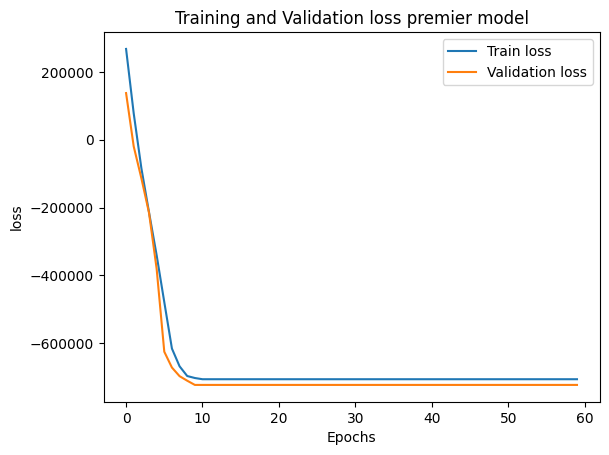

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Example: Print the first 10 predictions and true labels
for i in range(10):
  print(f"Prediction: {y_pred[i][0]}, True Label: {y_test.iloc[i]}")

# Récupérer les valeurs d'exactitude d'entraînement et de validation depuis l'objet History
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Créer un graphique pour montrer l'exactitude d'entraînement et de validation au fil des époques
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and Validation loss premier model')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -684257.5000 
Test Loss: -688751.375
Test Accuracy: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Prediction: 1, True Label: 44001.20706
Prediction: 1, True Label: 51730.17434
Prediction: 1, True Label: 41147.46679
Prediction: 1, True Label: 57303.87131
Prediction: 1, True Label: 27625.44144
Prediction: 1, True Label: 30736.5798
Prediction: 1, True Label: 45115.52566
Prediction: 1, True Label: 42139.64528
Prediction: 1, True Label: 32291.18978
Prediction: 1, True Label: 42866.21274


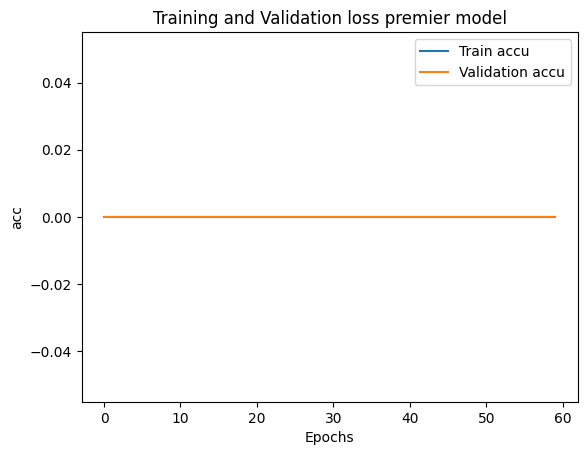

In [49]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Example: Print the first 10 predictions and true labels
for i in range(10):
  print(f"Prediction: {y_pred[i][0]}, True Label: {y_test.iloc[i]}")

# Récupérer les valeurs d'exactitude d'entraînement et de validation depuis l'objet History
# train_loss = history.history['acc']
# val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Créer un graphique pour montrer l'exactitude d'entraînement et de validation au fil des époques
plt.plot(train_accuracy, label='Train accu')
plt.plot(val_accuracy, label='Validation accu')
plt.title('Training and Validation loss premier model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()